In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#원핫인코더: 딸기 -> 100, 사과 -> 010, 바나나 -> 001
#레이블인코더: 딸기 -> 1, 사과 -> 2, 바나나 -> 3
# le=LabelEncoder()
# df['column']=le.fit_transform(df['column'])

train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")
train.shape #891, 12
test.shape #418, 11

train.dtypes
test.dtypes

print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
print(train.describe())
print(test.describe())

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   4

In [13]:
objDf=train.select_dtypes(include=['object']).copy() #형식이 objiect인 데이터 프레임을
objDf

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [14]:
objDf.isnull()

,Name,Sex,Ticket,Cabin,Embarked
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
886,False,False,False,True,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


In [4]:
any([False,False,False]) #False
any([False,True,False]) #False
# any 함수는 어느 하나라도 True -> True
# all 함수는 모두 True -> True

True

In [7]:
#열단위로 읽어서 하나라도 True가 있는지 확인하고 싶다 : any에 넣어서 True이면 null이 있다.
objDf.isnull().any(axis=0)

# Name        False null이 없다
# Sex         False
# Ticket      False
# Cabin        True null이 있다
# Embarked     True

Name        False
Sex         False
Ticket      False
Cabin        True
Embarked     True
dtype: bool

In [8]:
objDf.isnull().any(axis=1)

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

In [9]:
objDf[objDf.isnull().any(axis=1)] # 불린 참조 : 결측값이 있는 행들만 반환한다.

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S
...,...,...,...,...,...
884,"Sutehall, Mr. Henry Jr",male,SOTON/OQ 392076,NaN,S
885,"Rice, Mrs. William (Margaret Norton)",female,382652,NaN,Q
886,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


In [16]:
objDf['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F2             3
              ..
E31            1
D7             1
C118           1
C45            1
E58            1
Name: Cabin, Length: 147, dtype: int64

In [26]:
# 트레이님 데이터 원핫 인코딩

train['Sex'].value_counts()
train.loc[train['Sex']=='male','Sex']=0 # male -> 0
train.loc[train['Sex']=='female','Sex']=1 # female -> 1

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")

In [33]:
# apply로 원핫인코딩하기
# train['Sex'].apply(적용하고자 하는 함수)
train['Sex'] = train['Sex'].apply(lambda x : 1 if x=='female' else 0)
test['Sex'] = test['Sex'].apply(lambda x : 1 if x=='female' else 0)

In [34]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
# 데이터 다시불러오기
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")

In [38]:
# 함수를 써서 레이블인코딩하기
def gen(data):
    #data의 성별을 숫자로 인코딩
    le = LabelEncoder()
    le.fit(['male','female'])
    data['Sex'] = le.transform(data['Sex'])
    return data

train = gen(train)
#test = gen(test)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train['Embarked_C'] = train['Embarked'].apply(lambda x : True if x=='C' else False)
train['Embarked_S'] = train['Embarked'].apply(lambda x : True if x=='S' else False)
train['Embarked_Q'] = train['Embarked'].apply(lambda x : True if x=='Q' else False)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,True,False


In [43]:
# 데이터 다시불러오기
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")

In [50]:
# get_dummies 이용한 원핫인코딩
def myData(data,col):
    #print(data[col])
    for c in col:
        data = pd.concat([data,pd.get_dummies(data[c], prefix=c)], axis=1)
        data = data.drop(c,axis=1)
    return data

In [51]:
col = ["Sex","Pclass","Embarked"] #3개열만 원핫인코딩
myData(train,col) # mydata 함수 적용

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0


In [52]:
# 데이터 다시불러오기
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")

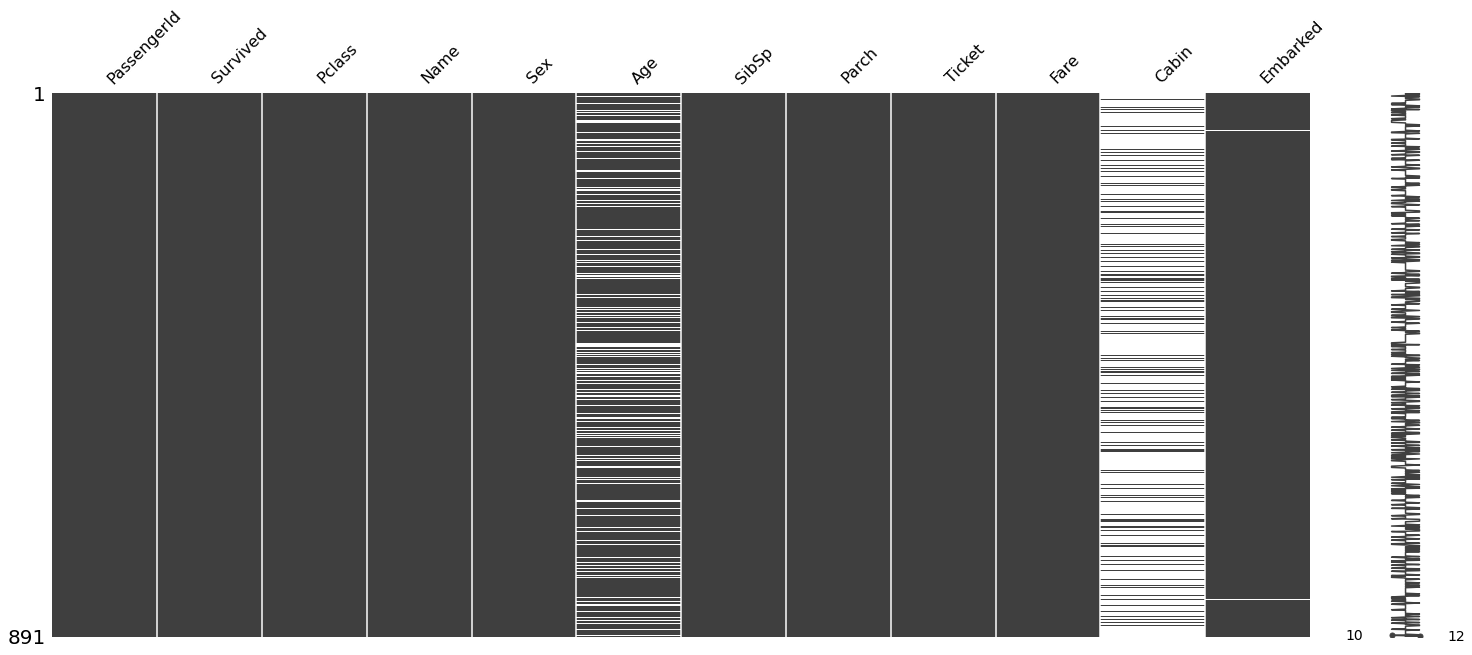

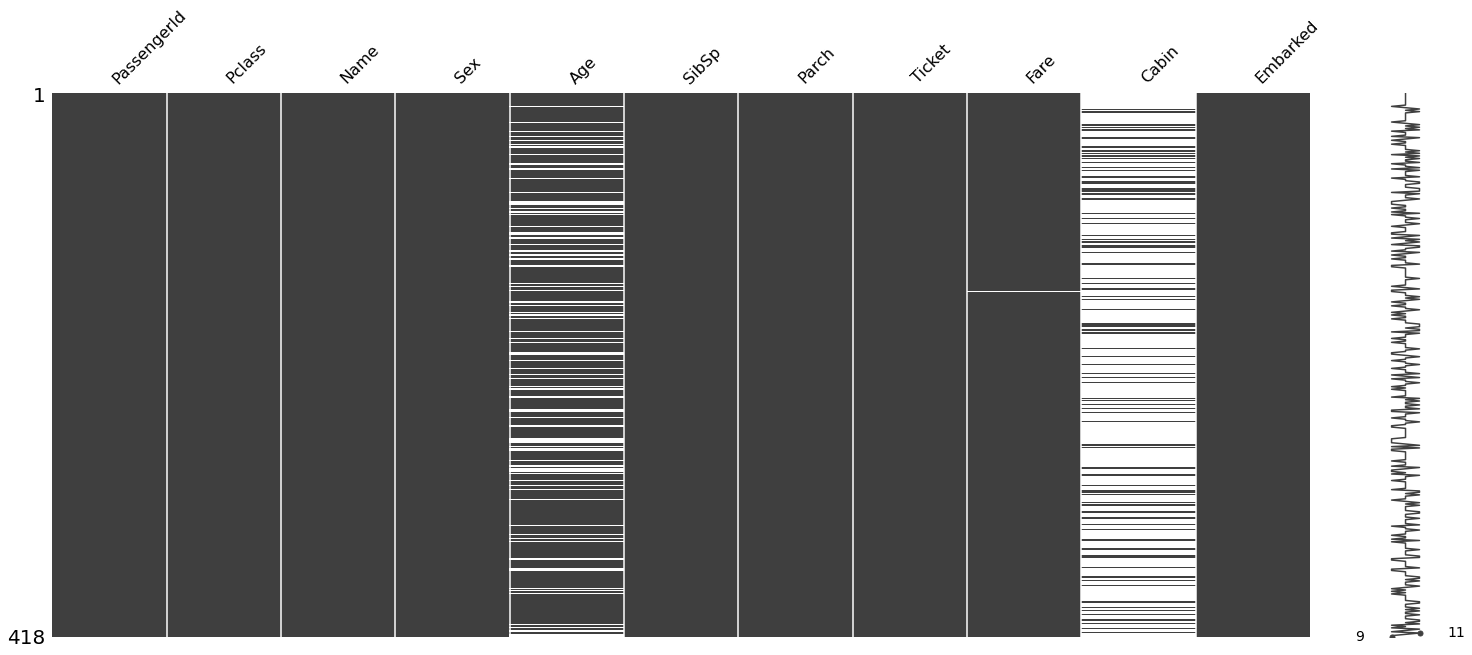

In [54]:
import missingno as msno
msno.matrix(train) #흰색이 결측치
msno.matrix(test)

In [55]:
train['Age_mean'] = train['Age']
train['Age_mean'].isnull().sum()
train['Age_mean'].fillna(train['Age'].mean(),inplace=True)

177

In [56]:
test['Age_mean'] = test['Age']
test['Age_mean'].isnull().sum()
test['Age_mean'].fillna(test['Age'].mean(),inplace=True)

In [59]:
# 숙제
train['Sex'].value_counts()
train['Gender'] = (train['Sex']=='female')
test['Gender'] = (test['Sex']=='female')

In [60]:
test['Gender']

0      False
1       True
2      False
3      False
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Name: Gender, Length: 418, dtype: bool

In [61]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Gender,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,True,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,True,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,True,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,False,True,False,False


In [63]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarked_S,Embarked_C,Embarked_Q
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True,True,False,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,False,False,True
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,True,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True,True,False,False


In [67]:
train['FamilySize'] = train['SibSp']+train['Parch']+1 #같이 승선한 가족의 수

In [68]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [72]:
train['Family'] = train['FamilySize']
train.loc[train['FamilySize']==1, 'Family']='S'
train.loc[(train['FamilySize']>1) & (train['FamilySize']<5), 'Family']='M'
train.loc[train['FamilySize']>=5, 'Family']='L'

In [70]:
train[['Family','FamilySize']]

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1
...,...,...
886,S,1
887,S,1
888,M,4
889,S,1


In [73]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [74]:
test['FamilySize'] = test['SibSp']+test['Parch']+1 #같이 승선한 가족의 수
test['Family'] = test['FamilySize']
test.loc[test['FamilySize']==1, 'Family']='S'
test.loc[(test['FamilySize']>1) & (test['FamilySize']<5), 'Family']='M'
test.loc[test['FamilySize']>=5, 'Family']='L'
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Family,Family_S,Family_M,Family_L
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,False,False,True,1,S,True,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True,True,False,False,2,M,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,False,False,True,1,S,True,False,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,True,False,False,1,S,True,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True,True,False,False,3,M,False,True,False


In [76]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [77]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [80]:
train['Pclass'].value_counts()
train['Pclass'] = train['Pclass'].astype('category')

In [82]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Age_mean        float64
Gender             bool
Embarked_S         bool
Embarked_C         bool
Embarked_Q         bool
FamilySize        int64
Family           object
Family_S           bool
Family_M           bool
Family_L           bool
dtype: object